In [167]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [168]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [169]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [170]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [171]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(df_market_data)

In [172]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    data=market_data_scaled,   # Use the scaled data
    columns=df_market_data.columns  # Use the original column names
)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled.index = crypto_names

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [173]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [174]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [175]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k': k_values,
    'Inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve_data)

In [176]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve_df.hvplot.line(
    x='k',
    y='Inertia',
    title='Elbow Curve (Original Scaled Data)',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    width=800,
    height=400
)

:Curve   [k]   (Inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The value of k is determined by the elbow point. In this case, k=4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [177]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=0)

In [178]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [179]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
crypto_clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [180]:
# Create a copy of the scaled DataFrame
df_clusters = df_market_data_scaled.copy()

In [181]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clusters['Cluster'] = k_model.labels_

# Display the copy of the scaled DataFrame
df_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,7


In [182]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",  # Color the points by their cluster label
    hover_cols=["coin_id"],  # Show the crypto name on hover
    width=800,
    height=400,
    title="Cryptocurrency Clusters"
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [183]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [184]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)
pca_df = pd.DataFrame(data=crypto_pca, columns=["PC1", "PC2", "PC3"])

# View the scaled PCA data
pca_df.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [185]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is approximately 0.895 (or 89.5%).

This value is obtained by summing the explained variance of each principal component:
0.3719856+0.34700813+0.17603793=0.89503166

In [186]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])


# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = df_market_data.index


# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)


# Display the scaled PCA DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [187]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [188]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pca_df)  # Use the PCA data here
    inertia.append(model.inertia_)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [189]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'K': range(1, 12),  # k values from 1 to 11
    'Inertia': inertia   # inertia values calculated from the KMeans models
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [190]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x='K', 
    y='Inertia', 
    title='Elbow Curve', 
    xlabel='Number of Clusters (K)', 
    ylabel='Inertia',
    width=800, 
    height=400
)

:Curve   [K]   (Inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 𝑘 when using the PCA data is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ; the best 𝑘 value found using the original data is also 4.







### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [191]:
# Initialize the K-Means model using the best value for k
k = 4 
kmeans_pca = KMeans(n_clusters=k, random_state=0)

In [192]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [193]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [194]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_copy['Cluster'] = pca_clusters


# Display the copy of the scaled PCA DataFrame
pca_df_copy.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [195]:
print(pca_df.columns)


Index(['PC1', 'PC2', 'PC3'], dtype='object')


In [196]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Cluster',  # Color by the cluster labels
    hover_cols=['coin_id'],  # Show crypto names on hover
    width=800, 
    height=400
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

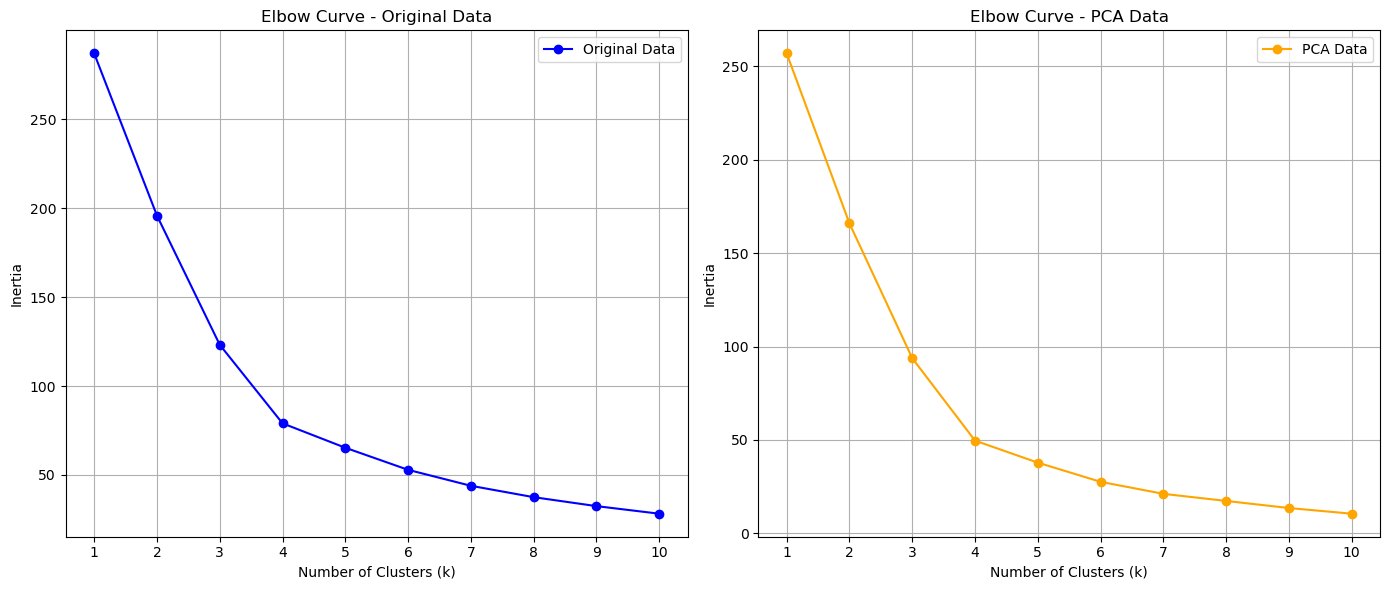

In [197]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(14, 6))

# Elbow curve for original data
plt.subplot(1, 2, 1)
plt.plot(range(1, len(inertia_values_original) + 1), inertia_values_original, marker='o', color='blue', label='Original Data')
plt.title('Elbow Curve - Original Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, len(inertia_values_original) + 1))
plt.grid()
plt.legend()

# Elbow curve for PCA data
plt.subplot(1, 2, 2)
plt.plot(range(1, len(inertia_values_pca) + 1), inertia_values_pca, marker='o', color='orange', label='PCA Data')
plt.title('Elbow Curve - PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, len(inertia_values_pca) + 1))
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



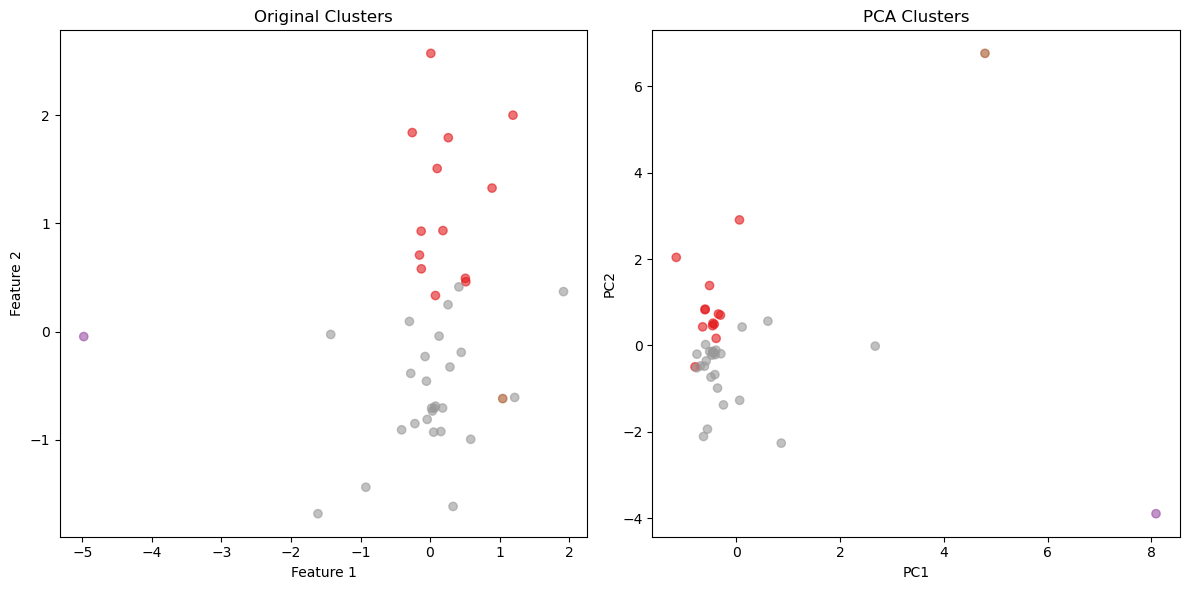

In [198]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original scatter plot
ax1.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_original, cmap='Set1', alpha=0.6)  # Adjust feature indices as needed
ax1.set_xlabel('Feature 1')  # Replace with actual feature name
ax1.set_ylabel('Feature 2')  # Replace with actual feature name
ax1.set_title('Original Clusters')

# Plot the PCA scatter plot
ax2.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca, cmap='Set1', alpha=0.6)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Clusters')

# Adjust spacing between subplots
fig.tight_layout()

# Display the composite plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Simplified Analysis: Fewer features make it easier to identify and interpret clusters, as the data is less complex.

Information Loss: Important data might be omitted, leading to less accurate clusters that don't capture the true patterns.

Efficiency: Reducing features speeds up calculations, which is especially helpful for large datasets.

Overfitting Reduction: Fewer features can help avoid overfitting by focusing on the most relevant aspects of the data.

Cluster Separation: The quality of clusters can improve if the remaining features effectively distinguish between different data points.

Overall, while fewer features can enhance clarity and efficiency, care must be taken to retain key information for accurate clustering.